In [15]:
#Ler o audio
y, sr = librosa.load('D:/Music Database/GTZAN Music Database/pop/pop.00020.wav', sr=44100) #SR = Sample Rate.
aqui.Audio(y, rate=sr) #Renderiza um audio player.


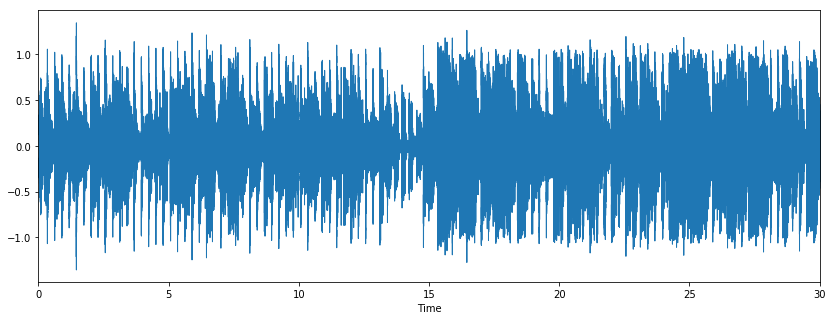

In [16]:
plt.figure(figsize=(14, 5)) #Parâmetros da figura.
librosa.display.waveplot(y, sr=sr) #Renderiza a figura do wav.


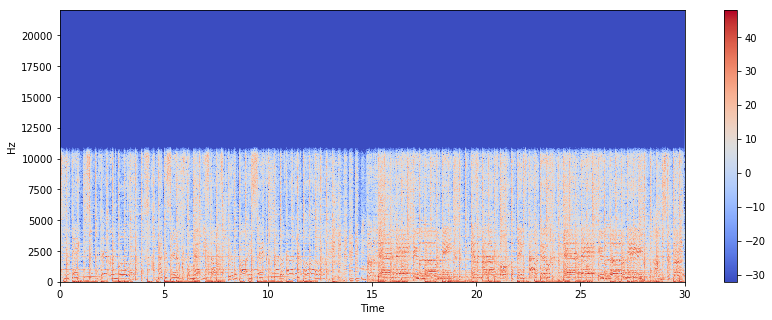

In [17]:
#Mel-Spectrogram 
y, sr = librosa.load('D:/Music Database/GTZAN Music Database/pop/pop.00020.wav', sr=44100) #SR = Sample Rate.
X = librosa.stft(y) #Transformada de fourier de curto tempo.
Xdb = librosa.amplitude_to_db(abs(X)) #Converte para decibéis.
plt.figure(figsize=(14, 5)) #Parâmetros da figura.
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') #Renderiza a figura.
plt.colorbar() #Barra de cores do lado.


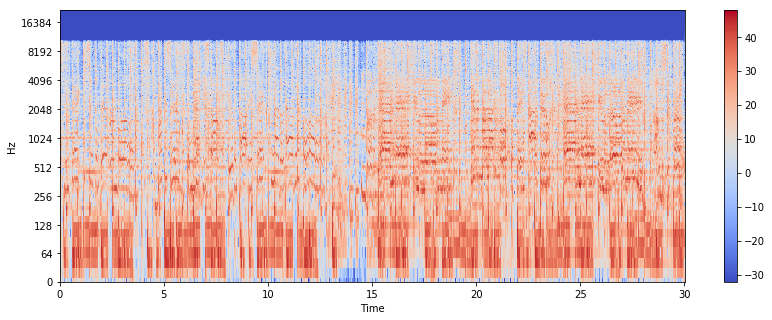

In [18]:
#Mel-Spectrogram 
y, sr = librosa.load('D:/Music Database/GTZAN Music Database/pop/pop.00020.wav', sr=44100) #SR = Sample Rate.
X = librosa.stft(y) #Transformada de fourier de curto tempo.
Xdb = librosa.amplitude_to_db(abs(X)) #Converte para decibéis.
plt.figure(figsize=(14, 5)) #Parâmetros da figura.
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log') #Renderiza a figura.
plt.colorbar() #Barra de cores do lado.


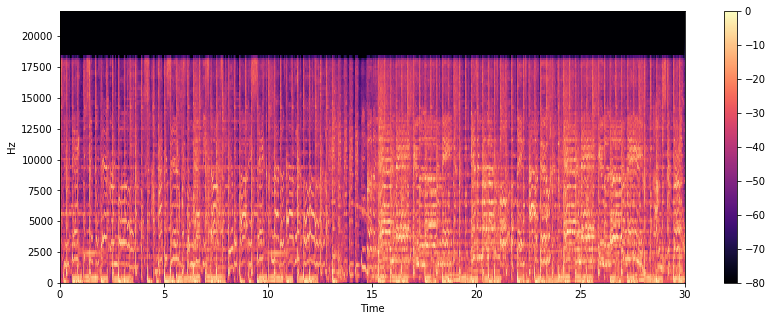

In [19]:
#Mel-scaled power spectrogram
S = librosa.feature.melspectrogram(y, sr=44100) #Obtem um Mel-spectrogram.
Sdb = librosa.power_to_db(S, ref=np.max) #Converte para decibéis.
plt.figure(figsize=(14, 5))
librosa.display.specshow(Sdb, sr=44100, x_axis='time', y_axis='hz')
plt.colorbar()


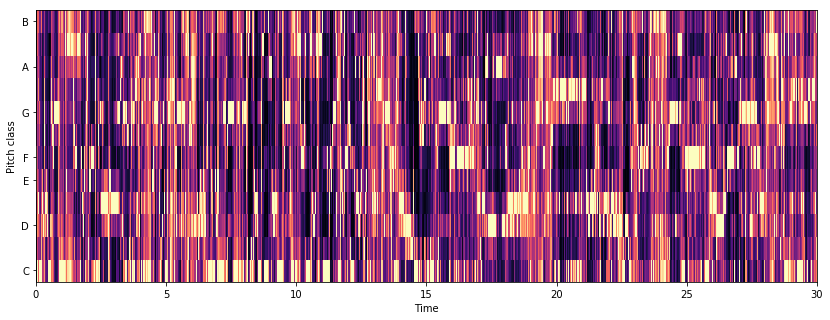

In [20]:
#Chromagram // Intensidade de cada uma das 12 notes
y, sr = librosa.load('D:/Music Database/GTZAN Music Database/pop/pop.00020.wav', sr=44100) 
chromagram = librosa.feature.chroma_stft(y=y, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.specshow(chromagram, sr=44100, x_axis='time', y_axis='chroma')


In [21]:
#Estimativa do tempo Estático
y, sr = librosa.load('D:/Music Database/GTZAN Music Database/pop/pop.00020.wav', sr=44100) 
onset_env = librosa.onset.onset_strength(y, sr=44100)
tempo = librosa.beat.tempo(onset_env, sr=44100)
tempo


array([139.67483108])

(23.37082066922887, 6682.972659445758, 0.32918818276464595, 0.9128287059617322)

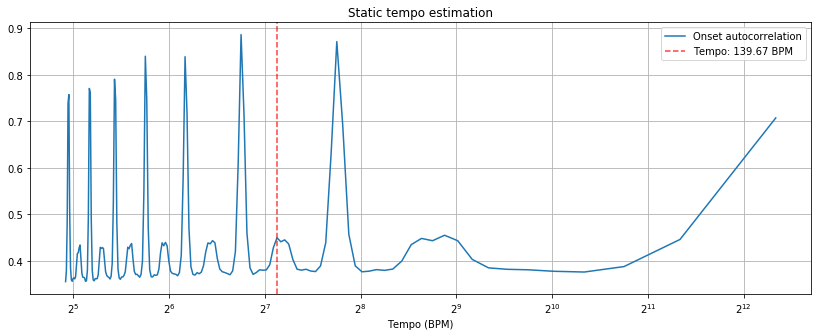

In [22]:
#Estimativa de tempo junto com grafico de autocorrelação do onset
y, sr = librosa.load('D:/Music Database/GTZAN Music Database/pop/pop.00020.wav', sr=44100) 
onset_env = librosa.onset.onset_strength(y, sr=44100)
tempo = np.asscalar(tempo) # Convert to scalar
# Compute 2-second windowed autocorrelation
hop_length = 512
ac = librosa.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = librosa.tempo_frequencies(len(ac), sr=sr,hop_length=hop_length)
# Plot on a BPM axis.  We skip the first (0-lag) bin.
plt.figure(figsize=(14,5))
plt.semilogx(freqs[1:], librosa.util.normalize(ac)[1:],label='Onset autocorrelation', basex=2)
plt.axvline(tempo, 0, 1, color='r', alpha=0.75, linestyle='--',label='Tempo: {:.2f} BPM'.format(tempo))
plt.xlabel('Tempo (BPM)')
plt.grid()
plt.title('Static tempo estimation')
plt.legend(frameon=True)
plt.axis('tight')


In [23]:
y, sr = librosa.load('D:/Music Database/GTZAN Music Database/pop/pop.00020.wav', sr=44100) 
onset_env = librosa.onset.onset_strength(y, sr=44100)
dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=44100, aggregate=None)
dtempo


array([107.66601562, 107.66601562, 107.66601562, ..., 107.66601562,
       107.66601562, 107.66601562])

Text(0.5, 1.0, 'Dynamic tempo estimation')

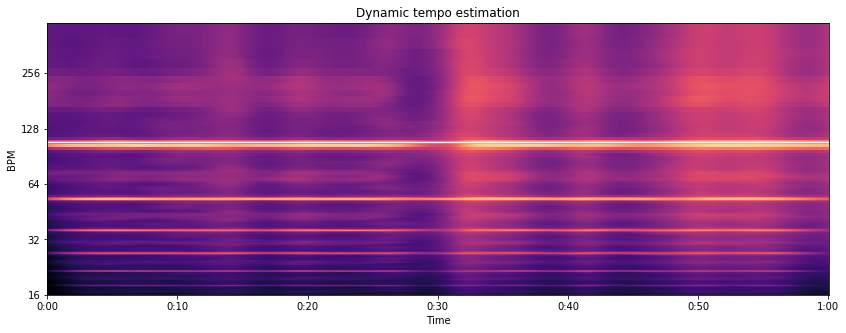

In [24]:
#Estimativa de tempo dinâmico com tempogram
y, sr = librosa.load('D:/Music Database/GTZAN Music Database/pop/pop.00020.wav', sr=44100) 
onset_env = librosa.onset.onset_strength(y, sr=44100)
plt.figure(figsize=(14,5))
tg = librosa.feature.tempogram(onset_envelope=onset_env, sr=44100,hop_length=512)
librosa.display.specshow(tg, x_axis='time', y_axis='tempo')
plt.plot(librosa.frames_to_time(np.arange(len(dtempo))), dtempo,color='w', linewidth=1.5, label='Tempo estimate')
plt.title('Dynamic tempo estimation')


In [25]:
#Beats
y, sr = librosa.load('D:/Music Database/GTZAN Music Database/pop/pop.00020.wav', sr=44100) 
y_harmonic, y_percussive = librosa.effects.hpss(y) #Separa harmonico do percursivo
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=44100)
beats[:20]


array([  6,  53, 101, 148, 197, 244, 292, 340, 383, 422, 460, 507, 555,
       603, 651, 699, 746, 794, 842, 890])

In [26]:
#Salva alguma imagem
Salvar_imagem = 'D:/Music Database/GTZAN Music Database/pop/pop.00020.jpg'
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=44100) #Escolher o espectrograma.
plt.margins(0)  # as suggested by Eran W
pylab.axis('off') # no axis
pylab.savefig(Salvar_imagem, transparent = True, bbox_inches = 'tight', pad_inches = 0)
pylab.close()
